# Importing Libraries

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats as sts
import datetime as dt
import os

# Loading Dataset

In [3]:
data=pd.read_csv('https://opendata.socrata.com/api/views/q2te-8cvq/rows.csv?accessType=DOWNLOAD',sep=',')


In [4]:
data.tail()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,06/08/2009,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


In [5]:
data.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [6]:
data.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [5]:
data.isnull().any()

Date            False
Time             True
Location         True
Operator         True
Flight #         True
Route            True
Type             True
Registration     True
cn/In            True
Aboard           True
Fatalities       True
Ground           True
Summary          True
dtype: bool

In [6]:
data['Fatalities'].fillna(0,inplace=True)
data['Aboard'].fillna(0,inplace=True)
data['Ground'].fillna(0,inplace=True)

# Convertin date sting to Date type

In [7]:
data['Date']=pd.to_datetime(data['Date'])
data['Date']=data['Date'].dt.strftime('%m/%d%/%Y')
data['Date'].head(10)

0    1908-09-17 00:00:00
1    1912-07-12 00:00:00
2    1913-08-06 00:00:00
3    1913-09-09 00:00:00
4    1913-10-17 00:00:00
5    1915-03-05 00:00:00
6    1915-09-03 00:00:00
7    1916-07-28 00:00:00
8    1916-09-24 00:00:00
9    1916-10-01 00:00:00
Name: Date, dtype: object

In [8]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Year'].head(5)

0    1908
1    1912
2    1913
3    1913
4    1913
Name: Year, dtype: int64

In [9]:
## threat Location visualisation
routes=data['Route']
routes=routes.dropna() #drop missing data
routes=routes.str.lower() #lower case
routes=routes.str.split(" - ") #split strings

routes=routes[routes.str.len()==2] #focus on routes involving two cities

clean_routes=pd.DataFrame({'departure': routes.str.get(0), 'destination': routes.str.get(1)})

clean_routes.head()

,departure,destination
80,toulon,algiers
83,"lympne, england","rotterdam, the netherlands"
96,"lakehurst, nj","s.t louis, mo"
102,paris,prague
106,new york,paris


In [10]:
cols=clean_routes.columns.tolist()

top_cities=clean_routes[cols[0]].value_counts()[0:20]
## mouse interactioní
from ipywidgets import interact
#import matplotlib as mpl
@interact( Route=cols, n_cities=(10,25))
def plot(Route,n_cities):
    top_cities=clean_routes[Route].value_counts()[0:n_cities]
    plt.rc('xtick', labelsize=14)
    plt.rc('ytick', labelsize=14)
    top_cities.plot(kind='bar',color="orange")
    plt.ylabel('total n. of crashes',fontsize=14)

interactive(children=(Dropdown(description='Route', options=('departure', 'destination'), value='departure'), …

# Ádding Survivors as a feature

In [11]:
data['Survived'] = data['Aboard'] - data['Fatalities']
data['Survived'].fillna(0, inplace = True)

In [11]:
print(data.head(5))


         Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration cn/In  Aboard  Fatalities  Ground  \
0          NaN     1     2.0         1.0     0.0   
1          NaN   NaN     5.0         5.0     0.0   
2          NaN   NaN

In [13]:
data.describe()


,Aboard,Fatalities,Ground,Year,Survived
count,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000
mean,27.439446,20.022589,1.602126,1971.300304,7.416856
std,43.023370,33.175910,53.875057,22.387541,28.122513
min,0.000000,0.000000,0.000000,1908.000000,-87.000000
25%,5.000000,3.000000,0.000000,1954.000000,0.000000
50%,13.000000,9.000000,0.000000,1973.000000,0.000000
75%,30.000000,23.000000,0.000000,1990.000000,2.000000
max,644.000000,583.000000,2750.000000,2009.000000,516.000000


In [14]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
sns.set_context('talk')
sns.set_style('whitegrid')
sns.set_palette('tab20')

# Visual 

In [15]:
total_crashes_year = data[['Year', 'Date']].groupby('Year').count()
total_crashes_year = total_crashes_year.reset_index()
total_crashes_year.columns = ['Year', 'Crashes']

Text(0.5, 0, '')

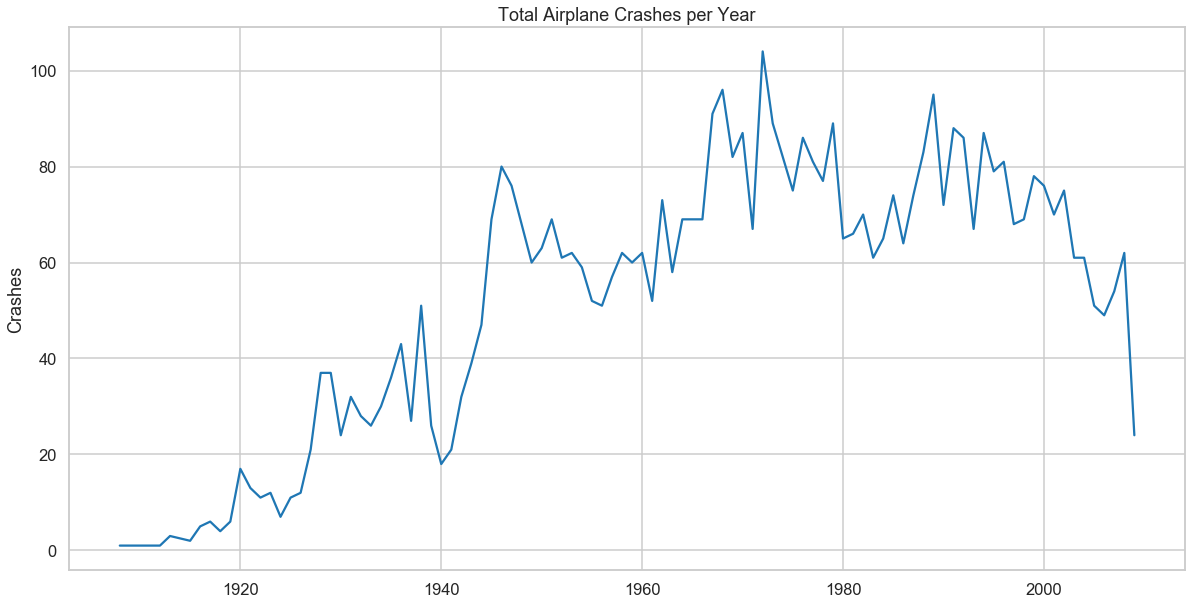

In [16]:
sns.lineplot(x = 'Year', y = 'Crashes', data = total_crashes_year)
plt.title('Total Airplane Crashes per Year')
plt.xlabel('')

In [17]:
total_crashes_year[total_crashes_year['Crashes'] > 80]

,Year,Crashes
55,1967,91
56,1968,96
57,1969,82
58,1970,87
60,1972,104
61,1973,89
62,1974,82
64,1976,86
65,1977,81
67,1979,89


In [18]:
#summarise
pcdeaths_year = data[['Year', 'Fatalities']].groupby('Year').sum()
pcdeaths_year.reset_index(inplace = True)


Text(0.5, 0, '')

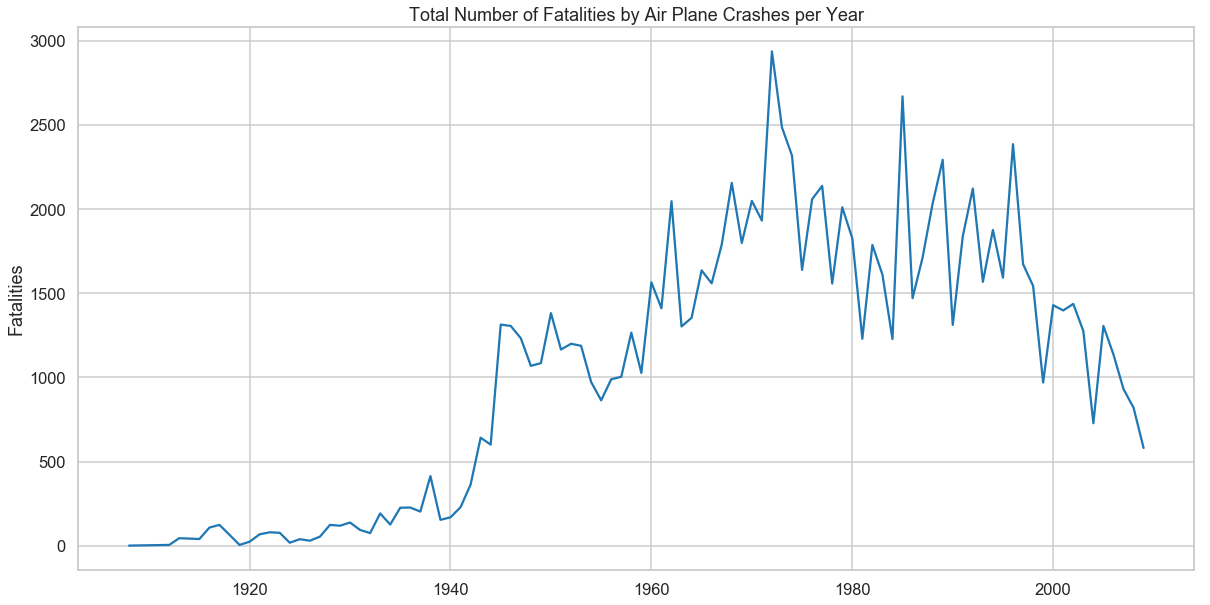

In [19]:
# Plot
sns.lineplot(x = 'Year', y = 'Fatalities', data = pcdeaths_year)
plt.title('Total Number of Fatalities by Air Plane Crashes per Year')
plt.xlabel('')

In [20]:
# summarise
abrd_per_year = data[['Year', 'Aboard']].groupby('Year').sum()
abrd_per_year = abrd_per_year.reset_index()

Text(0, 0.5, 'Count')

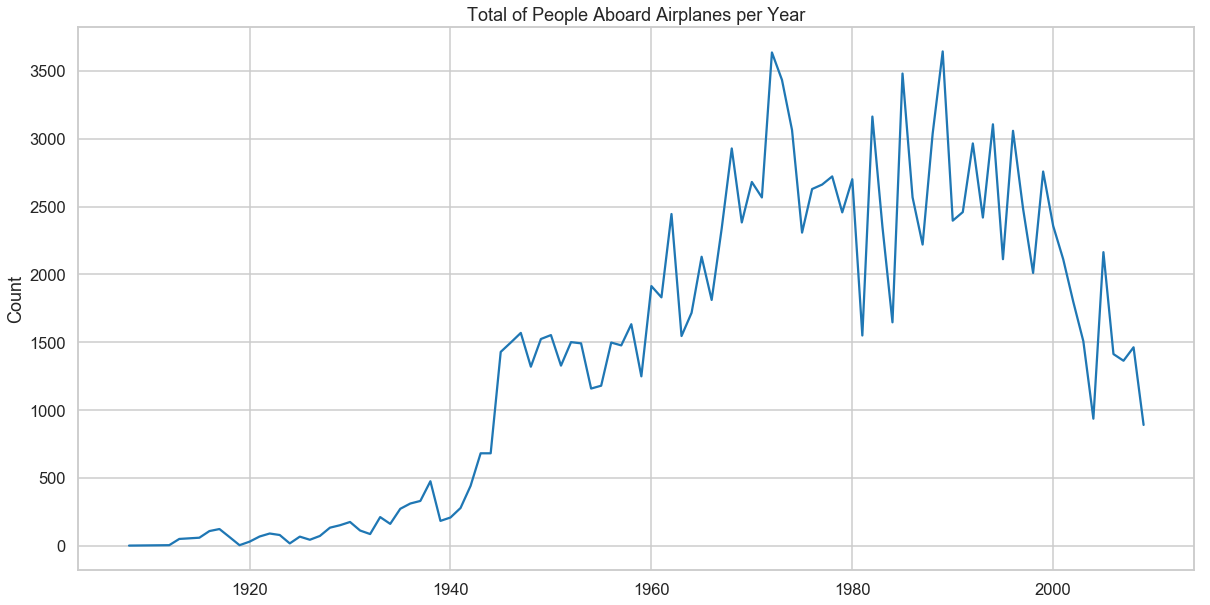

In [21]:
# plot
sns.lineplot(x = 'Year', y = 'Aboard', data = abrd_per_year)
plt.title('Total of People Aboard Airplanes per Year')
plt.xlabel('')
plt.ylabel('Count')

In [22]:
sts.pearsonr(data.Fatalities, data.Aboard)

(0.7569242287226604, 0.0)

In [23]:
sts.spearmanr(data.Fatalities, data.Aboard)

SpearmanrResult(correlation=0.7729747858599402, pvalue=0.0)

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Fatalities x People Aboard')

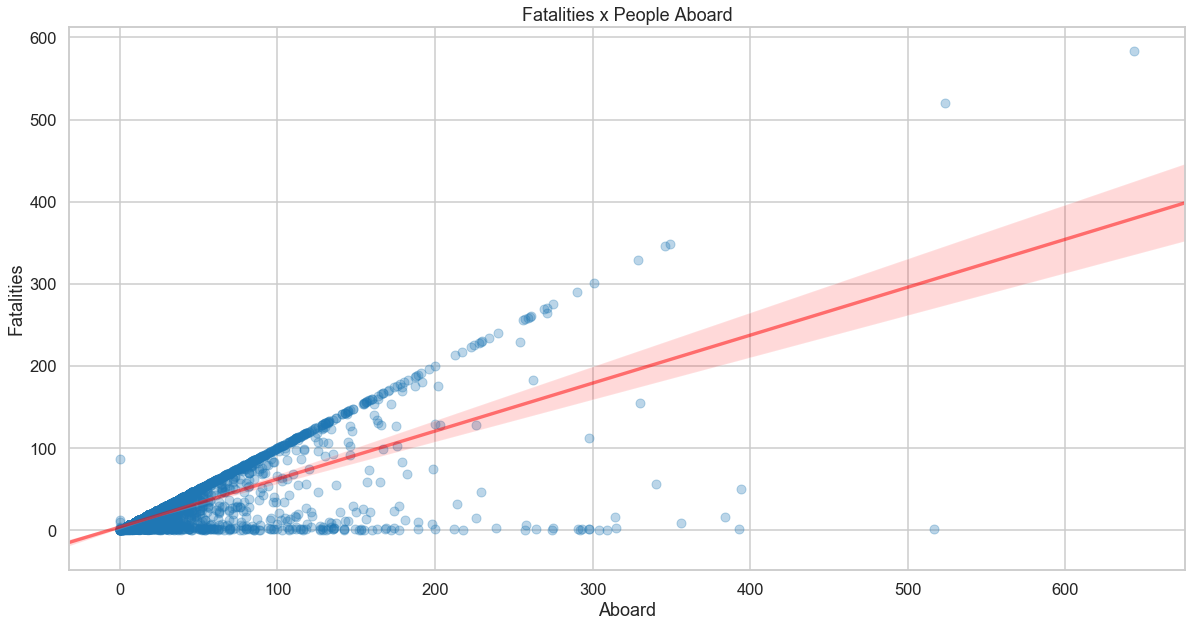

In [24]:
sns.regplot(x = 'Aboard', y = 'Fatalities',
            data = data, scatter_kws=dict(alpha = 0.3),
            line_kws=dict(color = 'red', alpha = 0.5))
plt.title('Fatalities x People Aboard')

In [25]:
#summarise
FSG_per_year = data[['Year', 'Fatalities', 'Survived', 'Ground']].groupby('Year').sum()
FSG_per_year = FSG_per_year.reset_index()

Text(0.5, 1.0, 'Fatalities vs Survived vs Killed on Ground per Year')

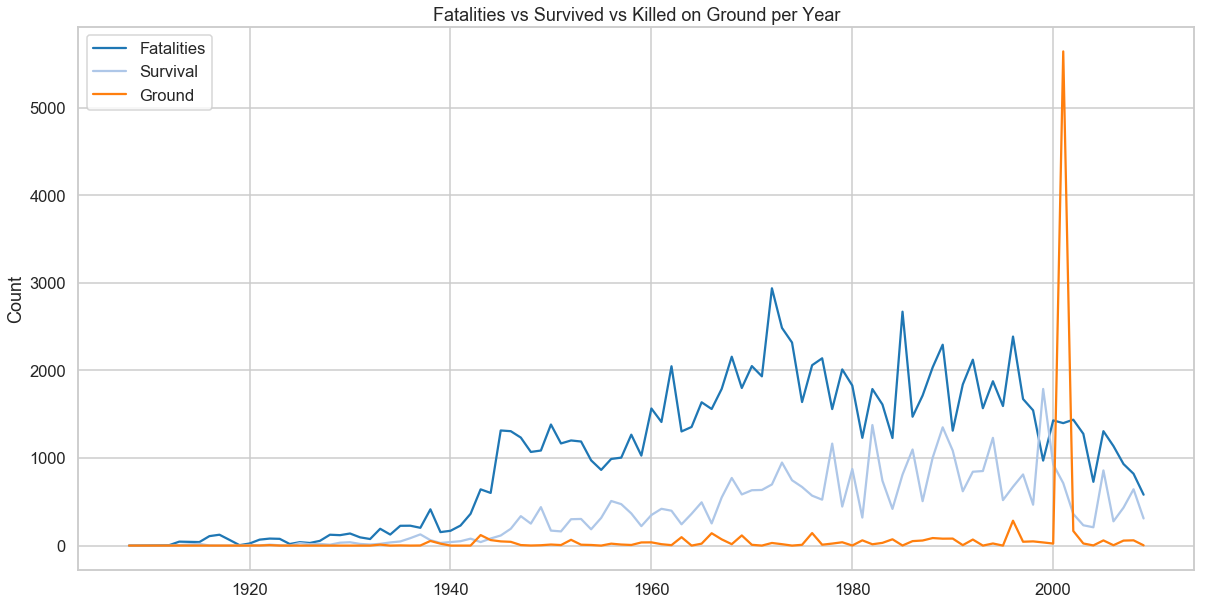

In [26]:
#plot
sns.lineplot(x = 'Year', y = 'Fatalities', data = FSG_per_year)
sns.lineplot(x = 'Year', y = 'Survived', data = FSG_per_year)
sns.lineplot(x = 'Year', y = 'Ground', data = FSG_per_year)
plt.legend(['Fatalities', 'Survival', 'Ground'])
plt.xlabel('')
plt.ylabel('Count')
plt.title('Fatalities vs Survived vs Killed on Ground per Year')

In [27]:
##Getting Peak
print(data['Ground'].max())
print ("@ ")
print(data[data['Ground'] == 2750])

2750.0
@ 
                     Date   Time                 Location           Operator  \
4803  2001-09-11 00:00:00  08:47  New York City, New York  American Airlines   
4804  2001-09-11 00:00:00  09:03  New York City, New York   United Air Lines   

     Flight #                 Route              Type Registration      cn/In  \
4803       11  Boston - Los Angeles  Boeing 767-223ER       N334AA  22332/169   
4804      175  Boston - Los Angeles  Boeing B-767-222       N612UA   21873/41   

      Aboard  Fatalities  Ground  \
4803    92.0        92.0  2750.0   
4804    65.0        65.0  2750.0   

                                                Summary  Year  Survived  
4803  The aircraft was hijacked shortly after it lef...  2001       0.0  
4804  The aircraft was hijacked shortly after it lef...  2001       0.0  


# RIP TO All PASSENGERS IN 9/11 Attack

There seems to be a trend towards increasing fraction of survivors, but it is not clear whether it is a deterministic or not in terms of trend. To verify this, let's look at the correlogram of the differenced series.

In [28]:
data['Date']=pd.to_datetime(data['Date'])

survivors_series=data.groupby(data['Date'].dt.year)['Survived'].mean()
survivors_series=pd.Series(survivors_series,index=survivors_series.index)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


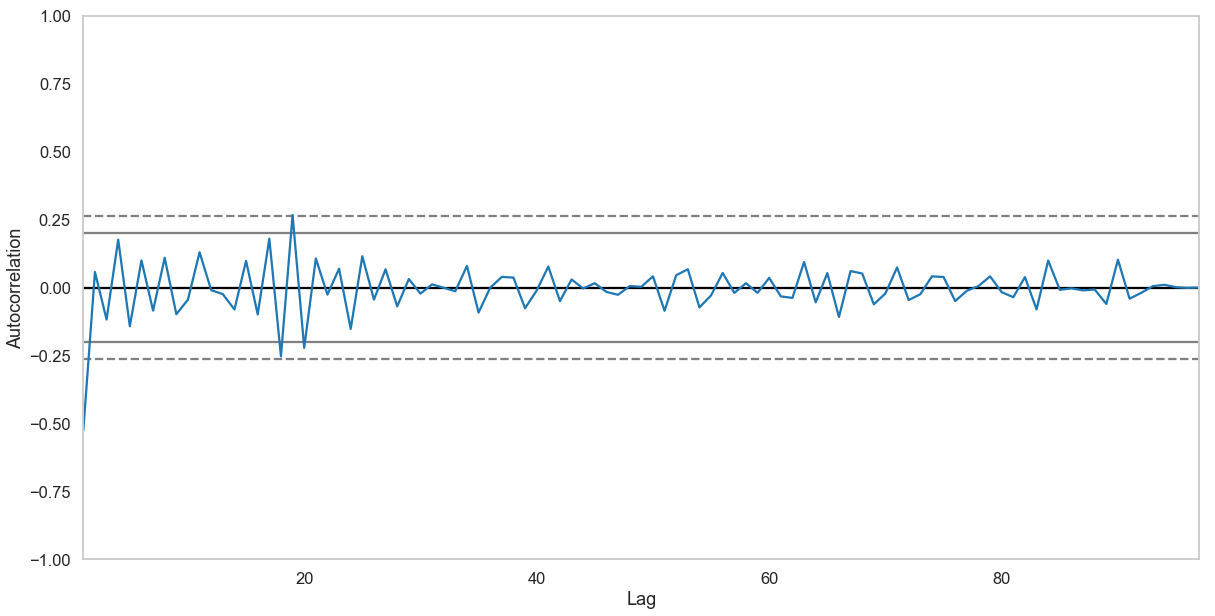

In [29]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(survivors_series.diff().dropna())



The correlogram is consistent with white noise. Thus, the original series is well approximated by a random walk.

#Conclusion

The time series of the mean fraction of survivors per year is consistent with a random walk, suggesting that the chances to survive an airplane crash have not substantially increased over the last century.

# Analysis of Text Features

In [30]:
##Text to vector representation
from sklearn.feature_extraction.text import TfidfVectorizer
## Adjust trash data
from sklearn.metrics import adjusted_rand_score
##Algo
from sklearn.cluster import KMeans

In [31]:
text_data = data['Summary'].dropna()
text_data = pd.DataFrame(text_data)

In [39]:
documents = list(text_data['Summary'])
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
from sklearn.preprocessing import MaxAbsScaler
mms = MaxAbsScaler()
mms.fit(X)
data_transformed = mms.transform(X)
data_transformed

<4878x9226 sparse matrix of type '<class 'numpy.float64'>'
	with 82832 stored elements in Compressed Sparse Row format>

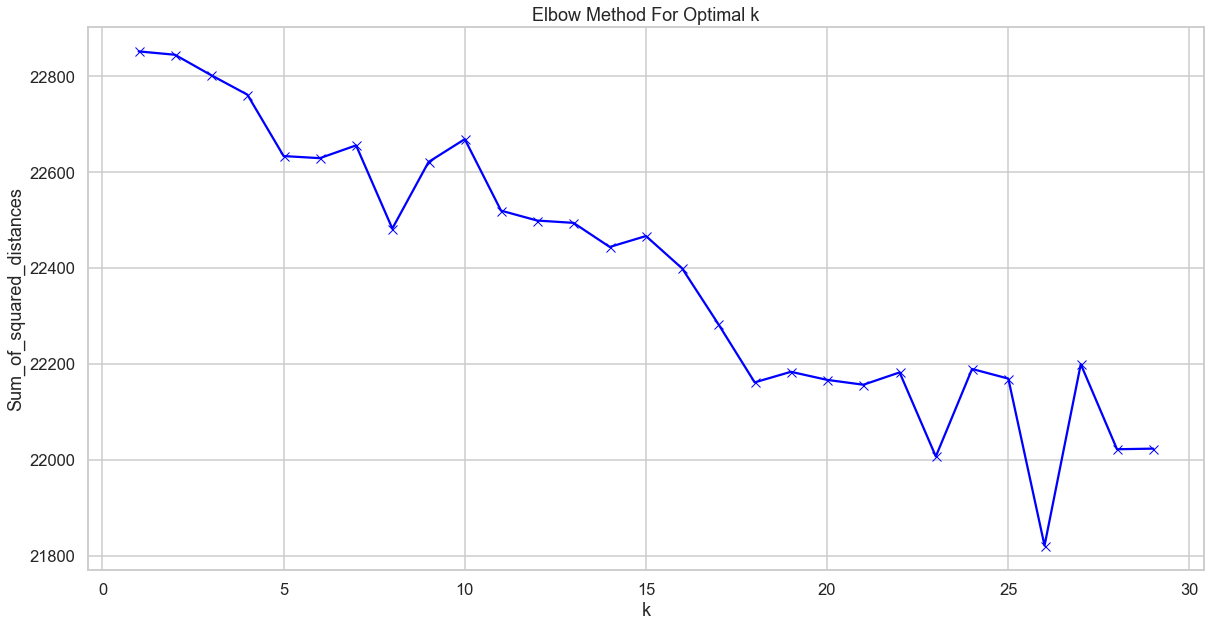

In [44]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k, max_iter=100, n_init=1)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()    

In [45]:
true_k = 5
model = KMeans(n_clusters=true_k, max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
print ('Most Common Terms per Cluster:')
order_centroids = model.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print('\nCluster %d:' % (i+1))
    for ind in order_centroids[i, :10]:
        print ('%s' % terms[ind]),
    print

Most Common Terms per Cluster:

Cluster 1:
engine
takeoff
crashed
failure
shortly
taking
plane
aircraft
lost
sea

Cluster 2:
approach
runway
crashed
attempting
plane
land
cargo
landing
short
fog

Cluster 3:
aircraft
crashed
plane
pilot
flight
taking
failure
control
crew
altitude

Cluster 4:
mountain
weather
conditions
poor
vfr
adverse
crashed
flight
flew
continued

Cluster 5:
en
route
crashed
disappeared
mountain
plane
cargo
mountains
wreckage
mountainous


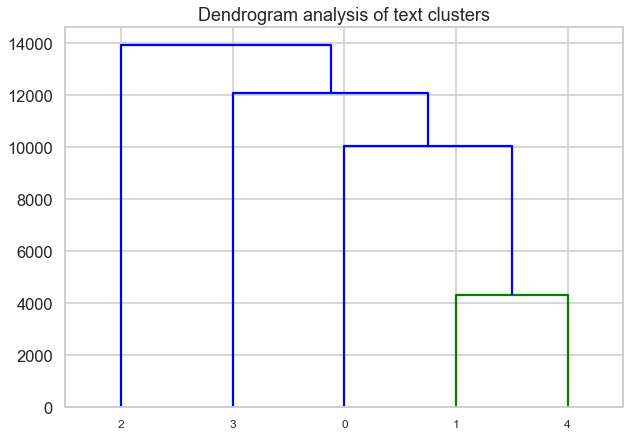

In [48]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram analysis of text clusters")  
dend = shc.dendrogram(shc.linkage(order_centroids[0:7, :10], method='ward'))